### Training a Ridge Regression Model
In this step, I am going to train a Ridge regressor using the pipeline described on One_hot_encoding.ipynb. Ridge regressor is a form of linear regression with a norm-2 regularization parameter. First, I am going to one hot encode the features in the same manner as before like the other models. I am going to proceed with the same example as before.

In [30]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast

#Loading the dataframe from the previous notebook
df = pd.read_csv('test.csv',index_col=0)

# Converting the string representation of the list to a list
df['Features'] = df['Features'].apply(lambda x: ast.literal_eval(x))
df

,Target,Features
Genes,,
Gene_1,1.717405,[TTCTCAAATACCCCTATTCTCAAATACCCCTATTCTCAAATATCC...
Gene_2,4.481926,[CCTCAATTCTCAAATACTCCTATTCTCAAATACCCCTAATCTCAA...
Gene_3,3.121352,[CAAATACCCTTTTATTCTCAAATACCTCTATTCTCTAATACCCAT...
Gene_4,0.739333,[AATACCCCTATTCTCAAATACCCCTATTCTCTAATACCCCTATTC...
Gene_5,2.347276,[AATACCCCTATTCTCAAATACCCCTATTCTCTAATACCCCTATTC...
Gene_6,5.212245,[CCCCTATTCTCAAATACCCTTTTATTCTCAAATACCCCTATTCTC...
Gene_7,0.262397,[CCTCTATTCTCTAATACCCATTCTCAAATACCATTTTATTCTCAA...
Gene_8,1.883738,[TTCAAATACCCCTATTCTCTAATACCCTTATTCTCAAATACCCCT...
Gene_9,3.030171,[CTCAAATACTCCTATTCTCAAATACCCCTATTCTCAAATACCCTT...


Next, we one hot encode it using the same functions as the other notebook.

In [31]:
# Functions from the other nothebook

def one_hot_encoding(features, all_features):
    one_hot = []
    for feature in all_features:
        if feature in features:
            one_hot.append(1)
        else:
            one_hot.append(0)
    return one_hot

def create_one_hot_encoding(df):

    '''
    This function takes a dataframe with a column named "Features" and creates a one hot encoding of the features.
    
    Parameters
    ----------
    df : pandas.DataFrame
    Dataframe with a column named "Features" that contains a list of features and a column named "Genes" that contains the gene names.
    Dataframe should also contain column called "Target" that contains the target.


        
    Returns
    ------- 
    df_one_hot : pandas.DataFrame
    Dataframe with one hot encoded features.
    
    '''
  
    #Preprocessing step

    # Making a list of all the features
    lists_of_features = df["Features"].values.flatten().tolist()

    # Nested list comprehension to create a single flattened list
    flattened_list = [item for sublist in lists_of_features for item in sublist]

    #making a set of the flattened lists features (removing duplicates)
    all_features = list(set(flattened_list))

    #  Creating one hot encoding dataframe keeping the same Gene names as index and the Target
    df_one_hot = pd.DataFrame(index=df.index)

    # Create columns names
    features_names = ["feature_" + str(i+1) for i in range(len(all_features))]

    # Add 100 columns with the names from the list to the DataFrame
    for col in features_names:
        df_one_hot[col] = ""

    # Adding one hot encoded features to the data frame
    for i,gene in enumerate(df.index):
        df_one_hot.loc[gene] = one_hot_encoding(df["Features"].values[i], all_features)

    #Adding the target from df
    df_one_hot.insert(0,"Target" , df["Target"])

    return df_one_hot

# Creating one hot encoding dataframe
lists_of_features = df["Features"].values.flatten().tolist()

# Nested list comprehension to create a single flattened list
flattened_list = [item for sublist in lists_of_features for item in sublist]

#making a set of the flattened lists features (removing duplicates)
all_features = list(set(flattened_list))

    #  Creating one hot encoding dataframe keeping the same Gene names as index and the Target
df_one_hot = pd.DataFrame(index=df.index)
df["Features"].values[0]

df_one_hot = create_one_hot_encoding(df)
display(df_one_hot)

,Target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70
Genes,,,,,,,,,,,,,,,,,,,,,
Gene_1,1.717405,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Gene_2,4.481926,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Gene_3,3.121352,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
Gene_4,0.739333,0,0,1,0,1,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
Gene_5,2.347276,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Gene_6,5.212245,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
Gene_7,0.262397,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
Gene_8,1.883738,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
Gene_9,3.030171,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


With the features and our target, we should be able to train a Ridge regressor. Before the training, like the other two models, I will make functions to perform cross-validation (CV) to evaluate our models. 

In [32]:
#Import CV Packages
from sklearn.model_selection import KFold

# RMSE function for two arrays
def rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

# Function that performs the cross validation
def run_cv(n_folds, model, X_train, y_train):
    """
    Args:
        n_folds (int) : how many folds of CV to do
        model (sklearn Model) : what model do we want to fit
        X_train (np.array) : feature matrix
        y_train (np.array) : target array
        
    Returns:
        a dictionary with scores from each fold for training and validation
            {'train' : [list of training scores],
             'val' : [list of validation scores]}
            - the length of each list = n_folds
    """
    
    folds = KFold(n_splits=n_folds).split(X_train, y_train)

    train_scores, val_scores = [], []
    for k, (train, val) in enumerate(folds):
        
        X_train_cv = X_train[train]
        y_train_cv = y_train[train]

        X_val_cv = X_train[val]
        y_val_cv = y_train[val]

        model.fit(X_train_cv, y_train_cv)

        y_train_cv_pred = model.predict(X_train_cv)
        y_val_cv_pred = model.predict(X_val_cv)

        train_acc = rmse(y_train_cv, y_train_cv_pred)
        val_acc = rmse(y_val_cv, y_val_cv_pred)

        train_scores.append(train_acc)
        val_scores.append(val_acc)

    print('%i Folds' % n_folds)
    print('Mean training rmse = %.3f +/- %.4f' % (np.mean(train_scores), np.std(train_scores)))
    print('Mean validation rmse = %.3f +/- %.4f' % (np.mean(val_scores), np.std(val_scores)))
    
    return {'train' : train_scores,
            'val' : val_scores}

Now, split into training and test set

In [33]:
#Importing Pachages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Splitting the dataset into the Training set and Test set
X = df_one_hot.iloc[:, 1:].values
y = df_one_hot.iloc[:, 0].values

# I will use 10% of the data for testing due to this being a small dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

# Support Vector Regression Model
ridge = Ridge(alpha=0.5)

n_folds = 8
x = run_cv(n_folds, ridge, X_train, y_train)

8 Folds
Mean training rmse = 0.064 +/- 0.0086
Mean validation rmse = 1.065 +/- 0.9065


This is also not bad compared to the other two models! In fact, the behavior is similar compared to RF and SVR.  More overfitted than the RF, but the **$\alpha$ hyperparameter** is a regularization parameter that can be tuned to avoid overfitting. This is a linear model so we cannot change the kernel. This also about 15% RMSE for the validation but the standard deviation is large possibly due to a dataset these small (10 samples) with these many features (~70 features).

Next, we compute the feature importances using the **weights/coefficients** of the linear model and **permutation importance**. Let us start with the weights.

Text(0, 0.5, 'Importance')

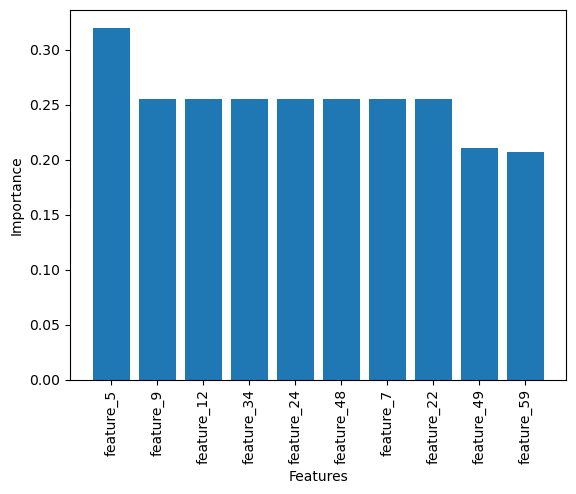

In [34]:
# Returns the coefficients/weights of the features
coefs = ridge.coef_

# Getting the names of the features
feature_names = df_one_hot.columns[1:]

# Getting the absolute linear importances and sorted indexes  
linear_importances = np.array([abs(coef) for coef in coefs] )
sorted_idx = linear_importances.argsort()[::-1]

    
# Plotting the feature importance
plt.bar(feature_names[sorted_idx[:10]],linear_importances[sorted_idx[:10]])
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importance')


The most important feature predicted was **feature_5**. Again, results might not be as significant, because, first the weights methods is not as robust as other feature importances methods. Let's try feature permutations.

In [35]:
#Importing package 
from sklearn.inspection import permutation_importance

# Splitting the training set into the Training validation set and Test validation sets
#X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size=0.1)
#svr.fit(X_train_train, y_train_train)

r = permutation_importance(estimator=ridge, X=X_train, y=y_train, n_repeats=500, random_state=7)

To make a more robust estimation of feature importance, **permutation importance** is used on a **subset** of the training set, as can be seen above! But for this examples it does not make much sense as we only have 10 samples.

Text(0, 0.5, 'Importance')

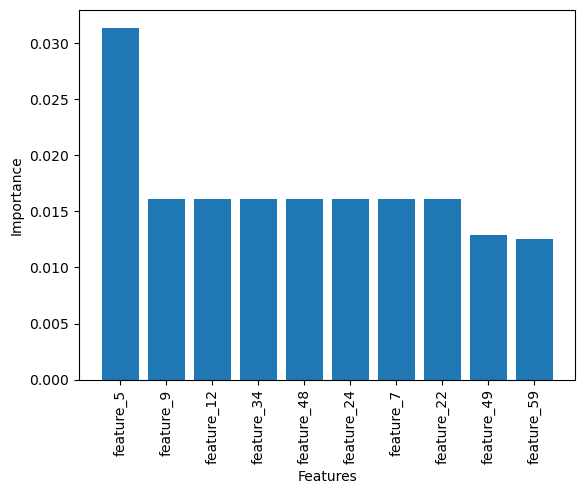

In [36]:
# Getting the names of the features
feature_names = df_one_hot.columns[1:]

# Getting the mean importances and sorted indexes   
mean_importances = r.importances_mean
sorted_idx = r.importances_mean.argsort()[::-1]

    
# Plotting the feature importance
plt.bar(feature_names[sorted_idx[:10]],mean_importances[sorted_idx[:10]])
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importance')

One can see that the linear model **Ridge** predicts that **feature 5** and **feature 9**, with the permutation, method are the most important feature just like the coeffecients method predicted! These are different from the ones predicted by SVR and RF, could be due to the linearity but also the sequences might be more similar than we think! I think if, with the real dataset, we get different feature importances, then we should compare them and maybe they are more similar than we think! 

In [37]:
# Determining the sequence attached to the most important feature

sequence1 = all_features[sorted_idx[0]]
sequence2 = all_features[sorted_idx[1]]

print("The most important sequence predicted by is: ", sequence1)
print("and the second most important sequence sequence is: ", sequence2)

The most important sequence predicted by is:  CCCTTAACCCTTAACCCTTAACCCTTAACCCTTAACCCTTAACCCTAAAC
and the second most important sequence sequence is:  TTCTCAAATACCTATTCTCAAATACCCCTATTCTCTAATACCCCTATTCT


Even tho, the sequences predicted for RF and Ridge were **Feature_40** and **Feature_9** were different notice that the first ~8kb are exactly the same! This is what I meant, by, if we get different important features with the real dataset, it is important to see if there are any similarity!